In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import time

In [2]:
file = open('lucrativescam.txt','r')
content = json.load(file)
df = pd.DataFrame(content, columns = ['Date', 'Value'])
df = df.sort_values(by = ['Value'])
df['Value'] = df['Value'].astype(float) 
df = df.sort_values(by=['Value'], ascending=False)
df

,Date,Value
0,"[5622, Scamming]",1.670908e+22
1,"[2135, Phishing]",6.583972e+21
2,"[90, Phishing]",5.972590e+21
3,"[2258, Phishing]",3.462808e+21
4,"[2137, Phishing]",3.389914e+21
5,"[2132, Scamming]",2.428075e+21
6,"[88, Phishing]",2.067751e+21
7,"[2358, Scamming]",1.835177e+21
8,"[2556, Phishing]",1.803047e+21
9,"[1200, Phishing]",1.630577e+21


In [4]:
time_scams = open('timescam.txt','r')
content = [[data[0][0].format(''), data[0][1], int(data[1])] for data in json.load(time_scams)]
df = pd.DataFrame(content, columns = ['Date', 'Category', 'Value'])
df['Date'] = pd.to_datetime(df['Date'], format='%m-%Y')
df = df.sort_values(by='Date')
df.head()

,Date,Category,Value
41,2017-05-01,Phishing,90000000000000000
39,2017-06-01,Scamming,9878410120000000000
24,2017-06-01,Fake ICO,182674023323763245056
12,2017-06-01,Phishing,1000000000000000000
0,2017-07-01,Phishing,10601485555862423470080


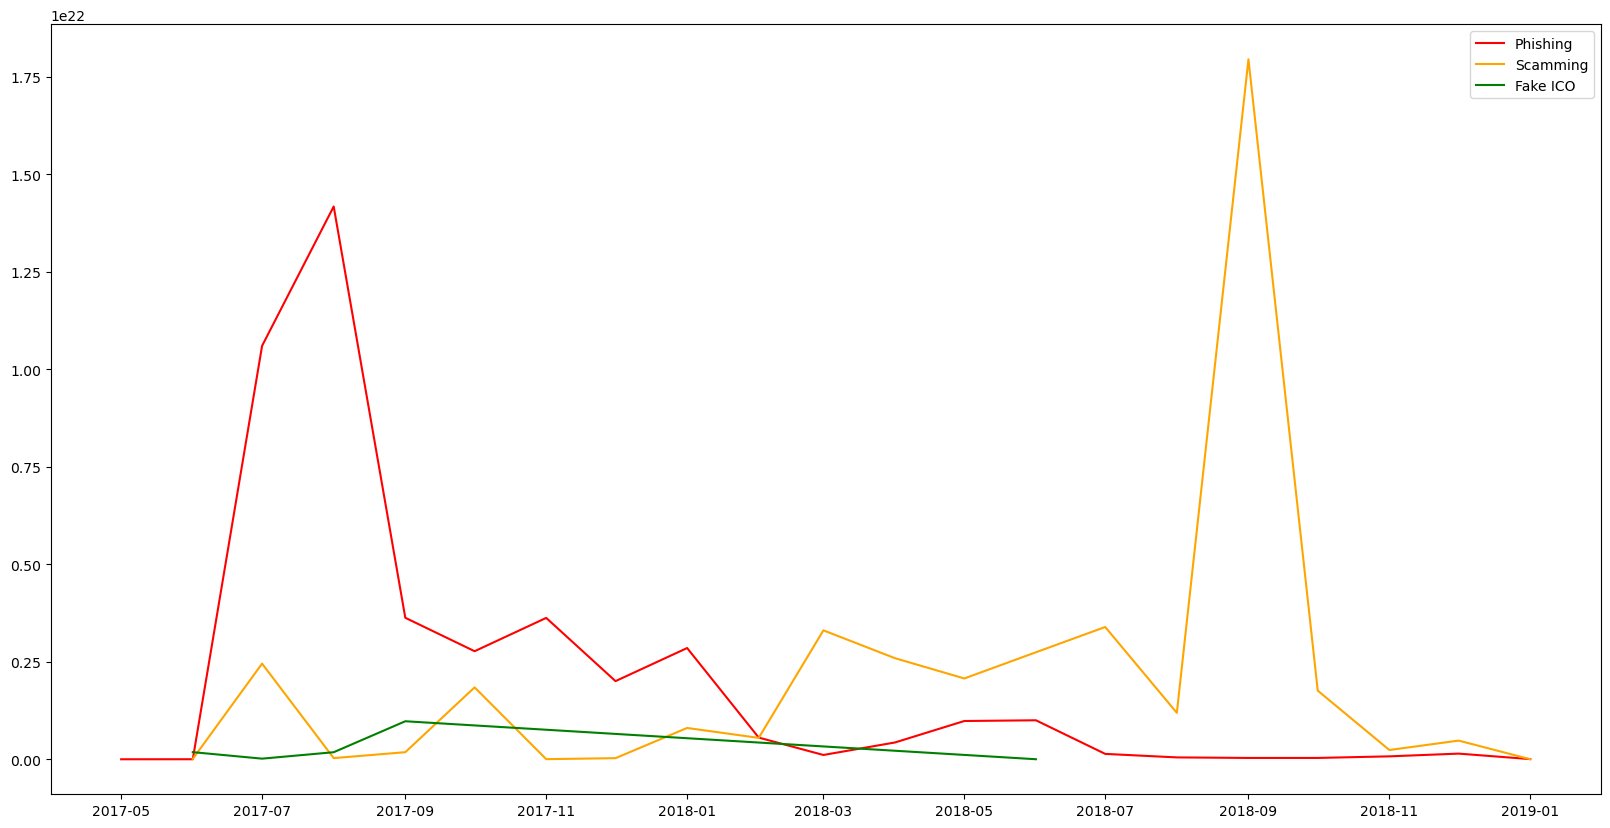

In [7]:
category_set = set(df['Category'])
plt.figure(figsize=(20,10))
colors = ['red', 'orange', 'green'] # list of colours to use for each line

for i, category in enumerate(category_set):
    selected_data = df.loc[df['Category'] == category]
    
    plt.plot(selected_data['Date'], selected_data['Value'], label=category, color=colors[i%3])
     
plt.legend()
plt.show()
